In [1]:
import pandas as pd 
import mglearn 
import numpy as np 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# import mglearn 
iris_dataset  = load_iris()

In [2]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_dataset['data'].shape

(150, 4)

In [5]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris_dataset['target'].shape

(150,)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0
)

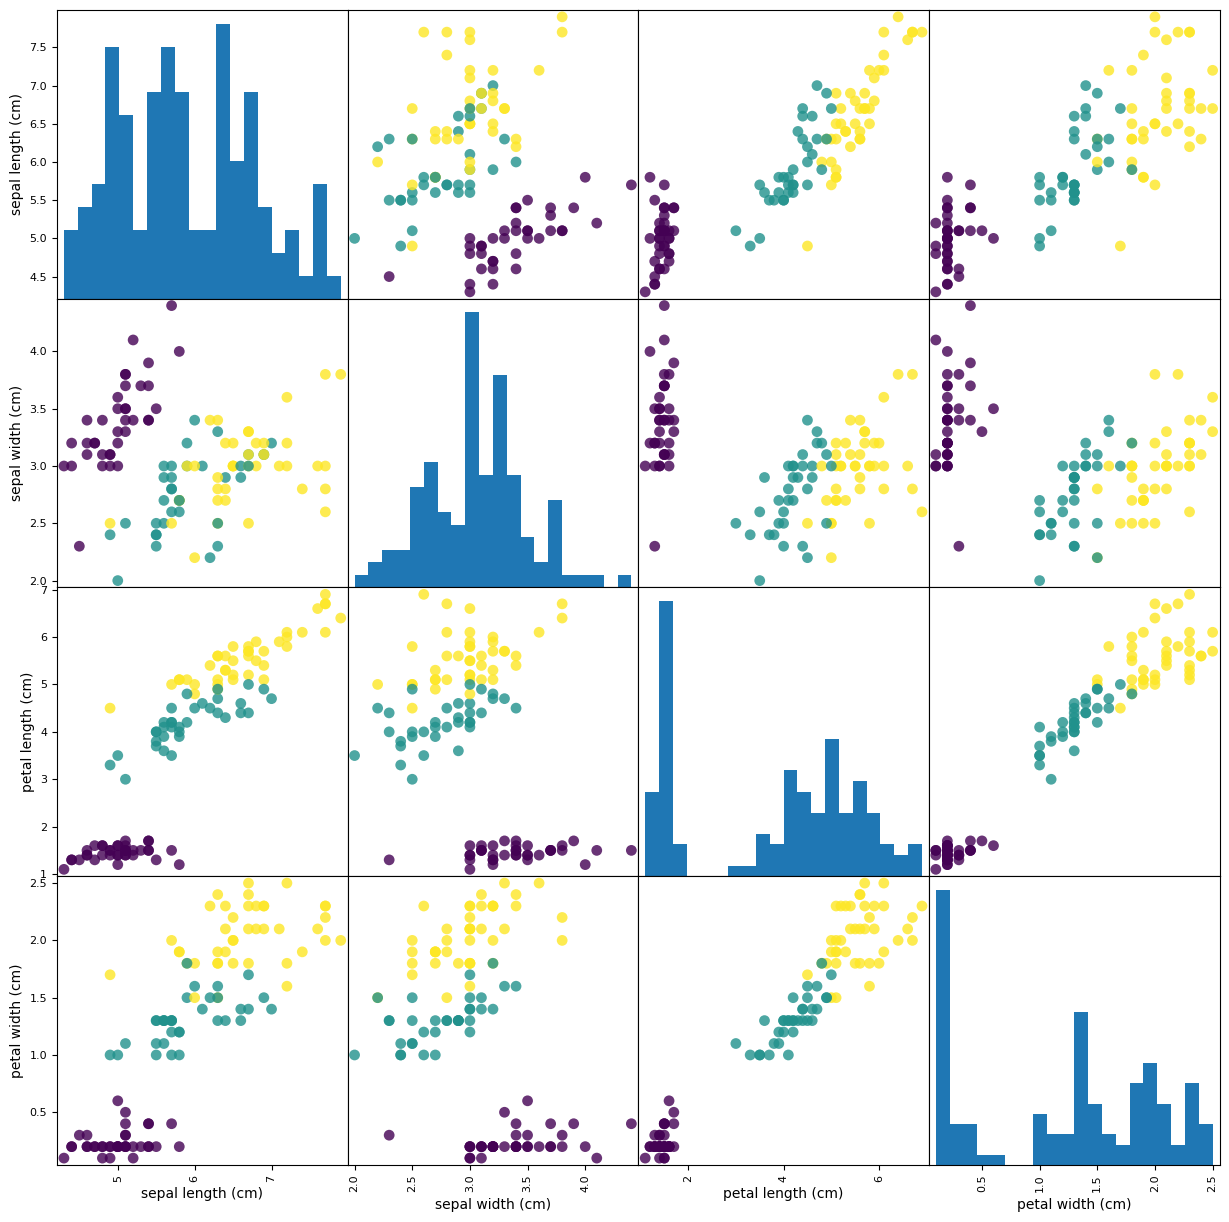

In [8]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                        hist_kwds={'bins':20}, s=60, alpha=.8)

k in k-nearest neighbor signifies instead of using the only closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=1)

In [10]:
X_new  = np.array([[5, 2.9, 1, 0.2]])
print(X_new.shape) 


(1, 4)


In [11]:
prediction = knn.predict(X_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [12]:
y_pred = knn.predict(X_test) 
print(y_pred)
# print(iris_dataset['target_names'][y_pred])

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [13]:
print("{:.2f}".format(np.mean(y_test == y_pred)))

0.97


In [14]:
print("{:.2f}".format(knn.score(X_test, y_test)))

0.97


## CHAPTER 2

### Supervised Learning  

Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/outputs pairs. 
we build a machine learning model from theses input/output pairs. Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up otherwise laborious or infeasible task

### Classification and Regression 

binary class is distinguish two classes,think binary class to answer a yes/no question. such as spam and not spam emails. multiclass classification is distinguish by more than two classes 

### Generalization

If a model is able to make accurate predictions on unseen data, we say it is able to generalize from the training set to the test set. we want to build a model that is able to generalize as accurately as possible


 * a larger datasets allow building more complex models. 
 * simply duplicating the same data points or collecting very similar data will not help 
 * Never underestimate the power of more data 

X.shape:(26, 2)


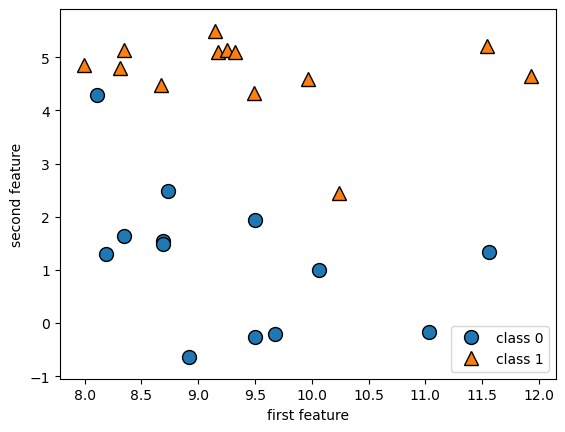

In [15]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("first feature") 
plt.ylabel("second feature") 
print("X.shape:{}".format(X.shape))

Text(0, 0.5, 'Target')

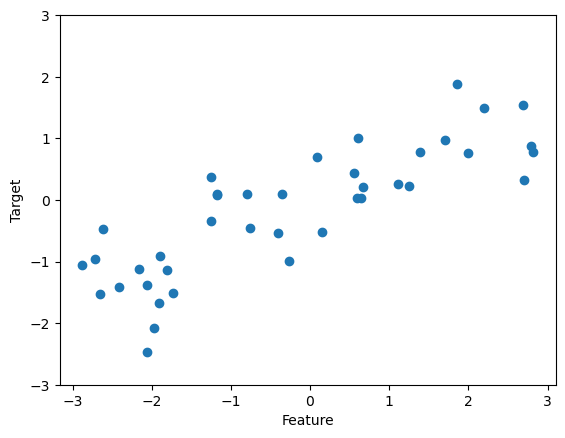

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o') 
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target') 


In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


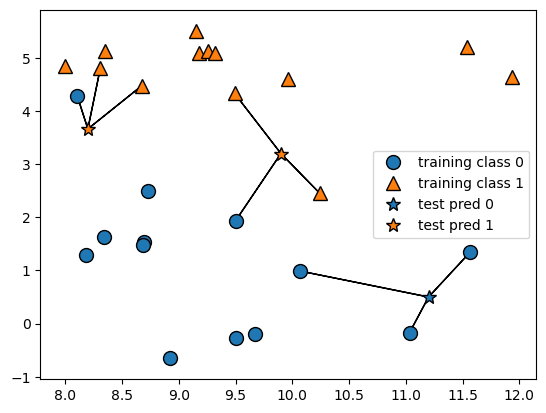

In [18]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [19]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [20]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [21]:
X_test

array([[11.54155807,  5.21116083],
       [10.06393839,  0.99078055],
       [ 9.49123469,  4.33224792],
       [ 8.18378052,  1.29564214],
       [ 8.30988863,  4.80623966],
       [10.24028948,  2.45544401],
       [ 8.34468785,  1.63824349]])

In [22]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [23]:
clf.score(X_test, y_test)

0.8571428571428571

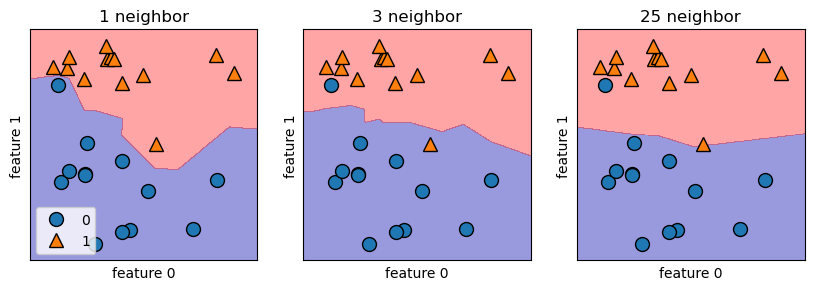

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 25], axes): 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

using a single neighbor results in a decision boundary that follows the training data closely.
Considering more and more neighbors leads to a smoother decision boundary. **A smoother boundary corresponds to a simpler model**.
In other words, using few neighbors corresponds to high model complexity and using many neighbors corresponds to low model complexity.

In [25]:
from sklearn.datasets import load_breast_cancer

cancer  = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(

    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)


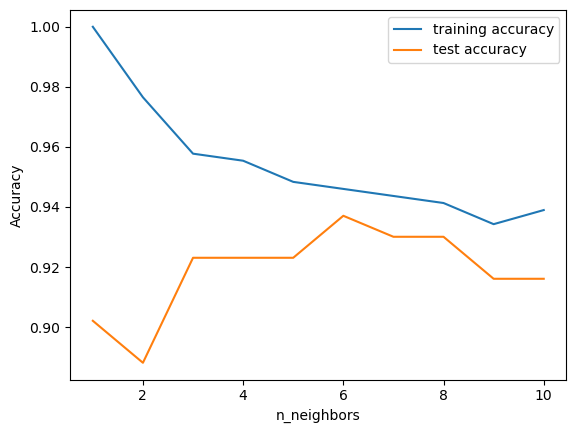

In [26]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11) 

for n_neighbors in neighbors_settings: 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train) 
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


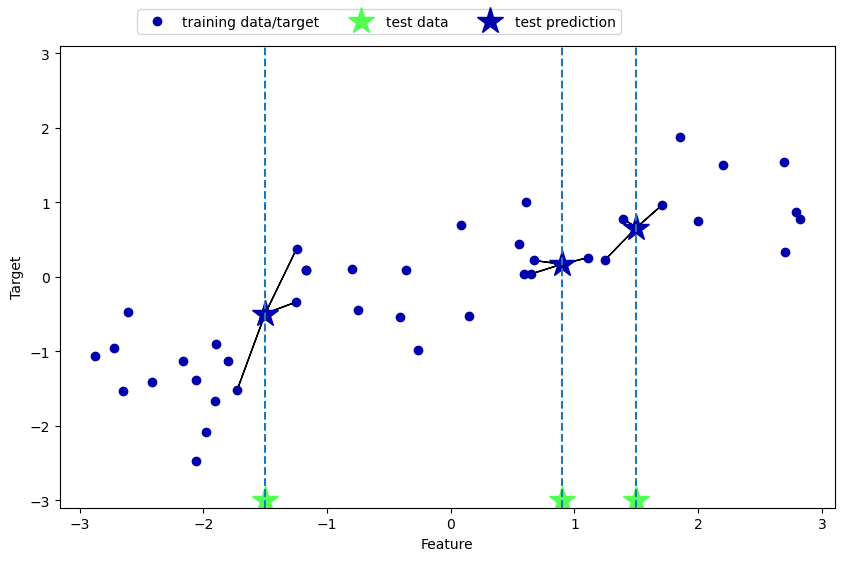

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor 

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3) 
reg.fit(X_train, y_train) 

print("Test set predictions {} ".format(reg.predict(X_test)))


Test set predictions [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398] 


In [29]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))


Test set R^2: 0.83


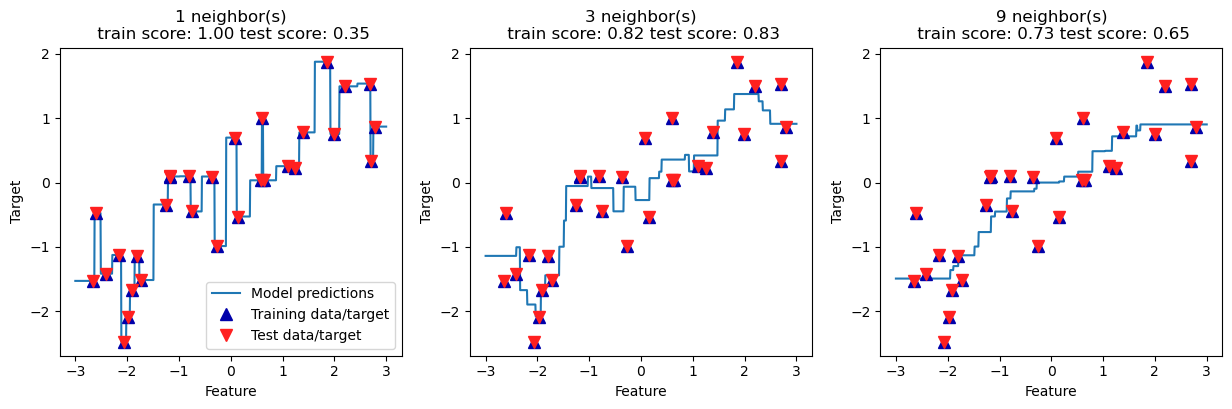

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes): 
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
    reg.fit(X_train, y_train) 
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_train, y_train, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test))
    )
    ax.set_xlabel("Feature") 
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc='best')

There are two important parameters to KNeighbors classifier are **the number of neighbor** and **how you measure distance between data points**. In practice, using a small number of neighbors like 3 or 5 often works well, but you should certainly **adjust this paramter**. By default **Euclidean** distance is used, which works well in many settings.
One of the strength of K-NN is that the model i very easy to understand and often gives reasonable performance without a lof of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. When the training set is very large(either in number of samples or number of features) prediction can be slow. when using K-NN algorithm, it's important to preprocess your data. this approach doesn't perform well on the datasets with many features (hundreds or more). k-nn is slow and inability to handle many features. 

### Linear Models

w[0]: 0.393906  b: -0.031804


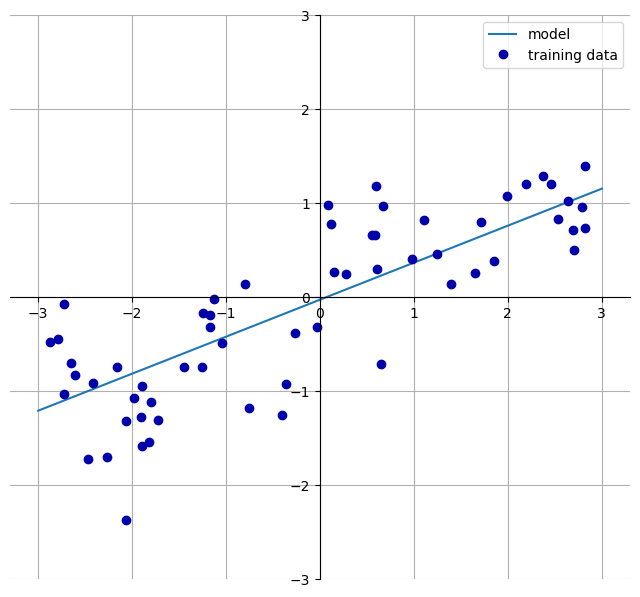

In [31]:
mglearn.plots.plot_linear_regression_wave()

For datasets with many features, linear model can be very powerful. In particular, if you have more features than training data points, any target y can be prefectly modeled(on the trainging set) as a linear function.


Linear regression (AKA ordinary least squares) is the simplest and most classic linear method for regression. 

In [32]:
from sklearn.linear_model import LinearRegression 
X, y = mglearn.datasets.make_wave(n_samples=60) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

lr = LinearRegression().fit(X_train, y_train)

"slope" parameters (w) called weights or coefficients are stored in the **coef_**, while the offset or intercept (b) is stored in the **intercept_**

In [33]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [35]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train) 


In [36]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [37]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [38]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [39]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


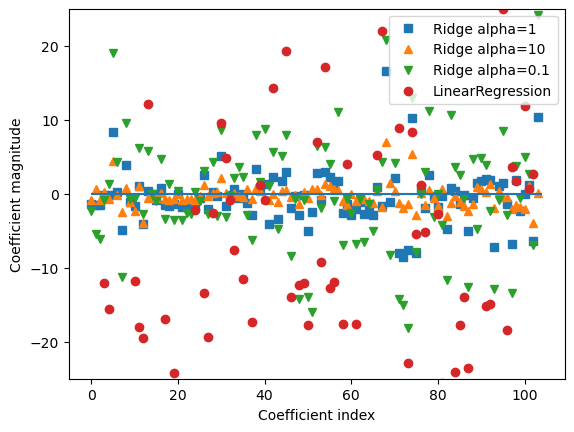

In [40]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

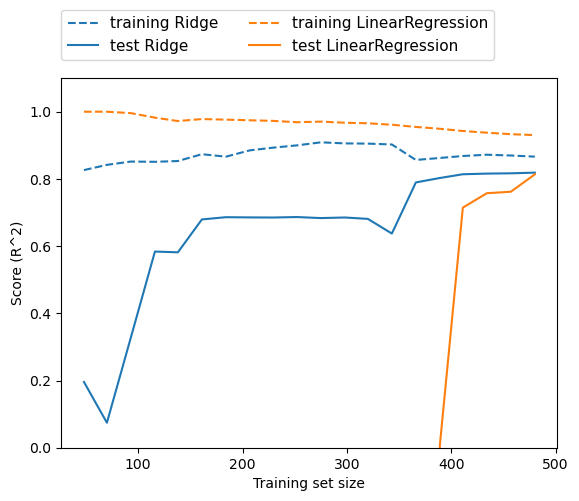

In [41]:
mglearn.plots.plot_ridge_n_samples()

The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance. Another interseting aspect is the decrease in training performance for linear regression, it becomes harder for a model to overfit, or memorize the data

### Lasso

An alternative to Ridge for regularizing linear regression is Lasso. Using the Lasso also restricts coefficients to be close to zero, but in a slightly different way, called **L1 regularization**. when using Lasso some coefficients are exactly zero. This means some feature are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes the model much easier to interpret.

In [53]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=1).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print(lasso.coef_.shape)

Training set score: 0.29
Test set score: 0.21
Number of features used: 4
(104,)


In [51]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
print(lasso.coef_.shape)

Training set score: 0.90
Test set score: 0.77
Number of features used: 33
(104,)


A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features, this makes this model potentially easier to understand. 
If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression

In [54]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96
